Taken from here: https://github.com/datsoftlyngby/dat4sem2020spring-python/blob/master/notebooks/10-4%20Clustering%20With%20MeanShift.ipynb

1. load 'iris_data.csv' into a dataframe



In [65]:
import pandas as pd

df = pd.read_csv('iris_data.csv')
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


2. get unique labels (Species column)

In [66]:
labels = df['Species'].unique()
labels

array(['I. setosa', 'I. versicolor', 'I. virginica'], dtype=object)

3. plot with a scatter plot each iris flower sample colored by label (3 different colors)  


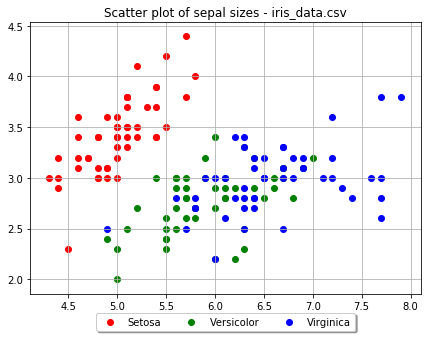

In [67]:
import matplotlib.pyplot as plt

setosa = df[df['Species'] == labels[0]]
versicolor = df[df['Species'] == labels[1]]
virginica = df[df['Species'] == labels[2]]
plt.figure(figsize=[7,5])
plt.title('Scatter plot of sepal sizes - iris_data.csv')
plt.scatter(setosa['Sepal length'],
            setosa['Sepal width'], c='r', label='Setosa')
plt.scatter(versicolor['Sepal length'],
            versicolor['Sepal width'], c='g', label='Versicolor')
plt.scatter(virginica['Sepal length'],
            virginica['Sepal width'], c='b', label='Virginica')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.grid()
#plt.savefig('ScatterPlot.png', dpi=1200)
plt.show()

4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters  
(HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result


In [68]:
from sklearn import preprocessing
# Sanitize dataframe (convert Species to 0, 1, 2)
label_enc = preprocessing.LabelEncoder()
df['Species'] = label_enc.fit_transform(df['Species'].astype(str))
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
from sklearn.cluster import estimate_bandwidth, MeanShift
bandwidth = estimate_bandwidth(df, quantile=0.2)
bandwidth

0.9714028141871647

In [70]:
analyzer = MeanShift(bandwidth=bandwidth) 
analyzer.fit(df)

MeanShift(bandwidth=0.9714028141871647, bin_seeding=False, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function

In [71]:
import numpy as np
labels = analyzer.labels_
cluster_count = len(np.unique(labels))
cluster_centers = analyzer.cluster_centers_

print('All labels:\n', labels)
#print('\n\n',np.unique(labels))
print('\nCluster centers:\n', cluster_centers)
print('\nAmount of clusters:\n', cluster_count)

All labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Cluster centers:
 [[4.98510638 3.41914894 1.47021277 0.24255319 0.        ]
 [5.93809524 2.79047619 4.29761905 1.33809524 1.        ]
 [6.37567568 2.95945946 5.36216216 2.04324324 2.        ]]

Amount of clusters:
 3


6. create a new scatter plot where each flower is colored according to cluster label
7. add a dot for the cluster centers

<Figure size 432x288 with 0 Axes>

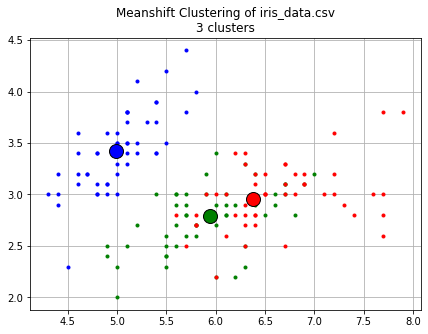

In [72]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html
from itertools import cycle

plt.clf()
plt.figure(figsize=[7,5])
plt.title(f'Meanshift Clustering of iris_data.csv\n{cluster_count} clusters')
plt.grid()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(cluster_count), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(df.iloc[my_members, 0], df.iloc[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

#plt.savefig('MeanshiftClustering.png', dpi=1200)
plt.show()

8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)

<img src="ScatterPlot.png" alt="drawing" width="600" height=600/>
<img src="MeanshiftClustering.png" alt="drawing" width="600" height=600/>